In [2]:
import pandas as pd
import os
print(os.getcwd())
df = pd.read_csv('../data/cleaned_data.csv')
df.describe()


d:\GitHub\lendingclub-default-risk\notebooks


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default_flag
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791651,25.414744,1.812850,0.121642,0.196129
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452654,11.886991,2.146141,0.356138,0.397068
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000,1.000000


In [3]:
df['default_flag'].value_counts(normalize=True)
df['long_term_loans'] = df['term'].apply(lambda x : 1 if x == ' 60 months' else 0)

In [4]:
numeric_columns = ['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies','long_term_loans']
grouped_stats = df.groupby('default_flag')[numeric_columns].describe().T
grouped_stats.to_csv('../data/descriptive_stats_by_default_flag.csv')


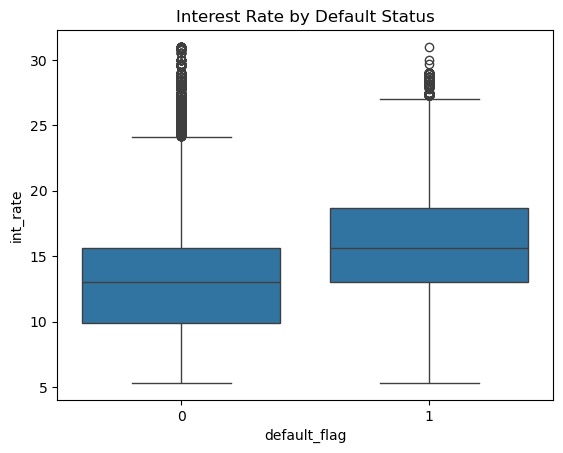

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Example numeric distribution
sns.boxplot(data=df, x='default_flag', y='int_rate')
plt.title('Interest Rate by Default Status')
plt.show()

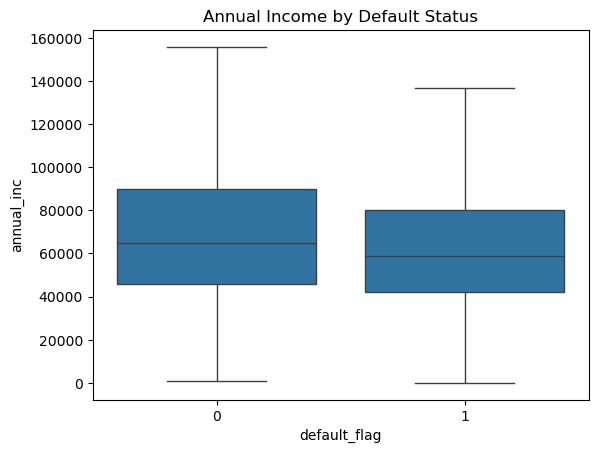

In [6]:
sns.boxplot(x='default_flag', y='annual_inc', data=df, showfliers=False)
plt.title("Annual Income by Default Status")
plt.show()

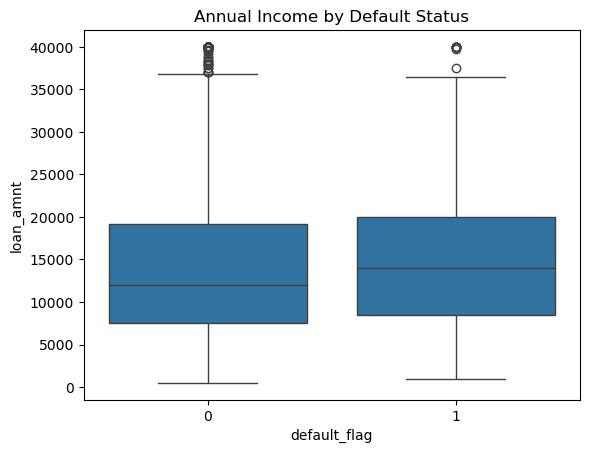

In [7]:
sns.boxplot(x='default_flag', y='loan_amnt', data=df)
plt.title("Annual Income by Default Status")
plt.show()

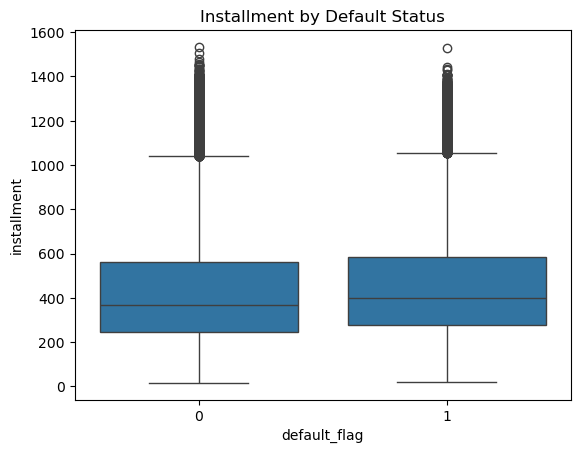

In [8]:
sns.boxplot(x='default_flag', y='installment', data=df)
plt.title("Installment by Default Status")
plt.show()

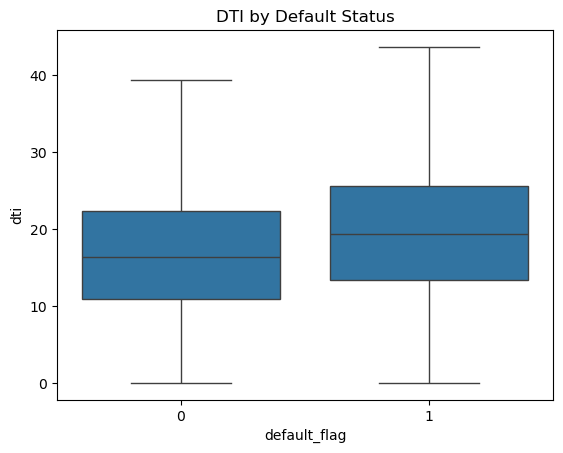

In [9]:
sns.boxplot(x='default_flag', y='dti', data=df, showfliers=False)
plt.title("DTI by Default Status")
plt.show()

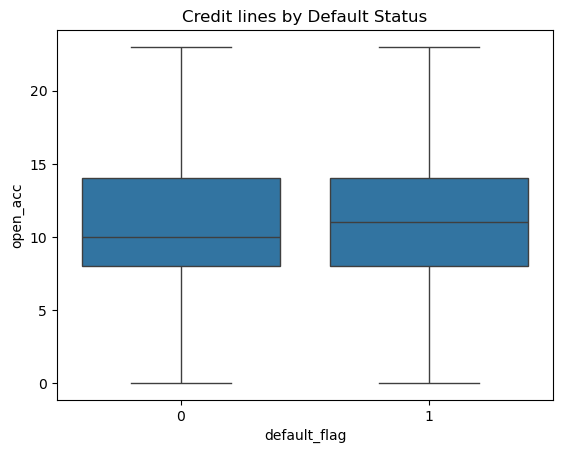

In [10]:
sns.boxplot(x='default_flag', y='open_acc', data=df, showfliers=False)
plt.title("Credit lines by Default Status")
plt.show()

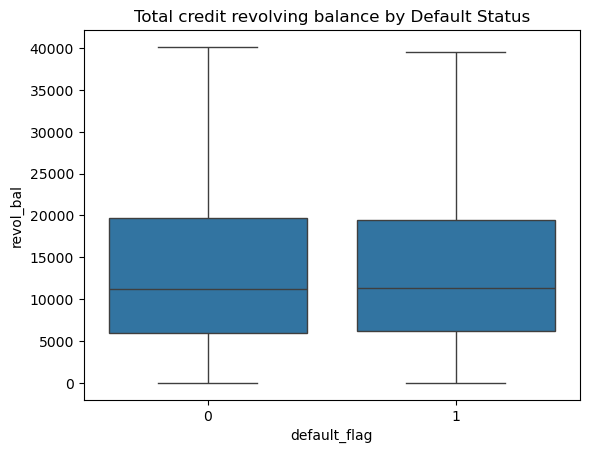

In [11]:
sns.boxplot(x='default_flag', y='revol_bal', data=df, showfliers=False)
plt.title("Total credit revolving balance by Default Status")
plt.show()

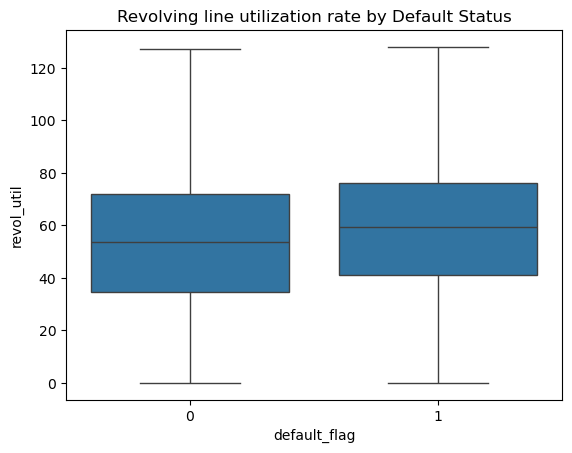

In [31]:
sns.boxplot(x='default_flag', y='revol_util', data=df, showfliers=False)
plt.title("Revolving line utilization rate by Default Status")
plt.show()

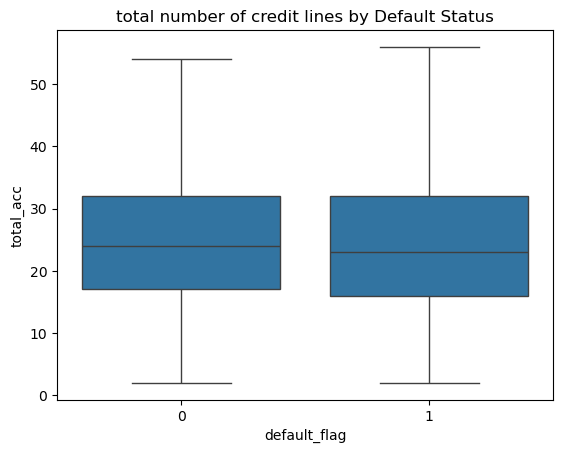

In [13]:
sns.boxplot(x='default_flag', y='total_acc', data=df, showfliers=False)
plt.title("total number of credit lines by Default Status")
plt.show()

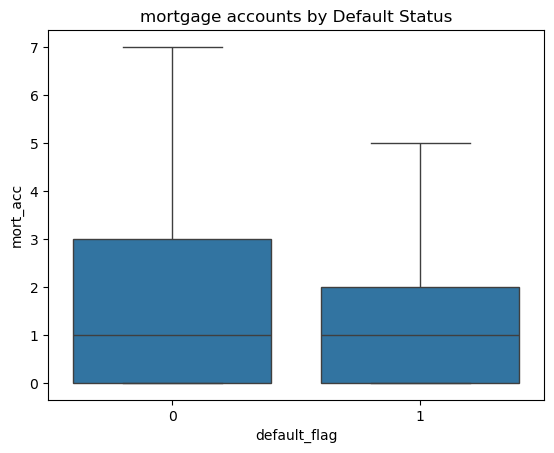

In [14]:
sns.boxplot(x='default_flag', y='mort_acc', data=df, showfliers=False)
plt.title("mortgage accounts by Default Status")
plt.show()

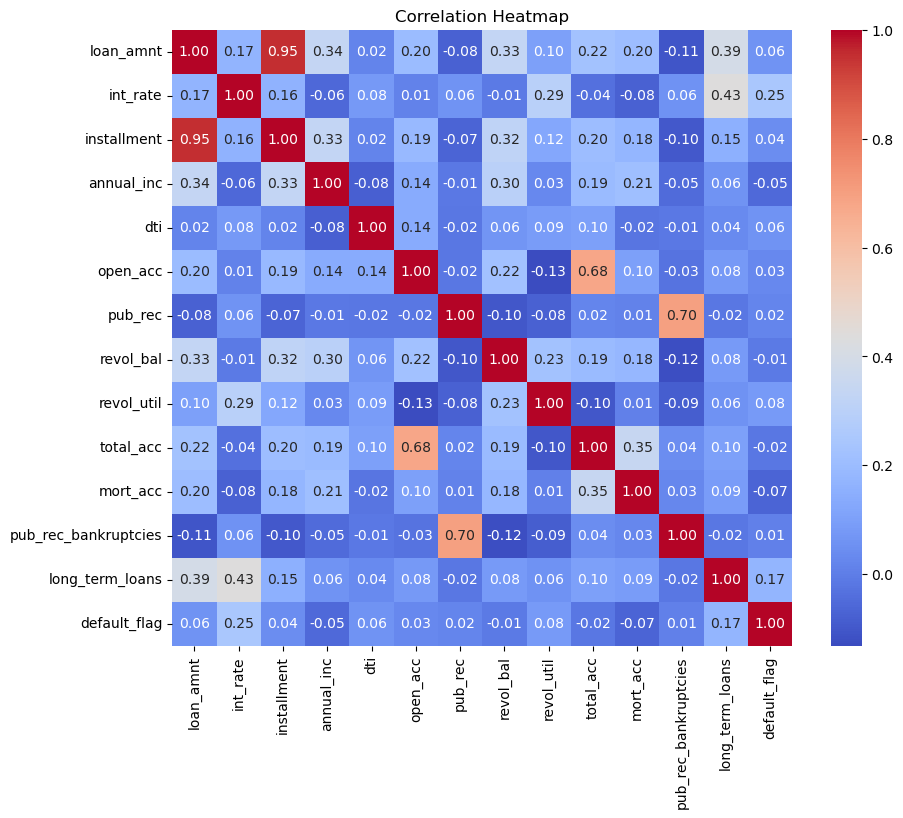

In [15]:
df_filtered = df.loc[:,['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies','long_term_loans', 'default_flag']]
corr = df_filtered.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
df.groupby('term')['default_flag'].mean().sort_values(ascending=False)

term
60 months    0.319415
36 months    0.157746
Name: default_flag, dtype: float64

## T-Test

**To determine if the mean of a numerical variable (e.g. int_rate) is significantly different between:**

- `Group A`: default_flag == 0 (Fully Paid)

- `Group B:` default_flag == 1 (Charged Off)



In [17]:
from scipy.stats import ttest_ind

group_0 = df[df['default_flag'] == 0]
group_1 = df[df['default_flag'] == 1]

for col in numeric_columns:
    t_stat, p_val = ttest_ind(group_0[col], group_1[col], equal_var=False)
    print(f"{col:15} | T-stat: {t_stat:8.2f} | P-value: {p_val:.4f}")


loan_amnt       | T-stat:   -37.17 | P-value: 0.0000
int_rate        | T-stat:  -159.39 | P-value: 0.0000
installment     | T-stat:   -25.99 | P-value: 0.0000
annual_inc      | T-stat:    35.06 | P-value: 0.0000
dti             | T-stat:   -21.32 | P-value: 0.0000
open_acc        | T-stat:   -17.25 | P-value: 0.0000
pub_rec         | T-stat:   -10.71 | P-value: 0.0000
revol_bal       | T-stat:     7.50 | P-value: 0.0000
revol_util      | T-stat:   -53.38 | P-value: 0.0000
total_acc       | T-stat:    11.24 | P-value: 0.0000
mort_acc        | T-stat:    44.63 | P-value: 0.0000
pub_rec_bankruptcies | T-stat:    -5.75 | P-value: 0.0000
long_term_loans | T-stat:   -98.43 | P-value: 0.0000


>Each of these numeric variables — such as int_rate, loan_amnt, dti, revol_util, mort_acc, etc. - has a statistically significant difference in mean values between defaulted and fully paid loans.

##  Chi-Square Test

**Check whether variables like grade, home_ownership, purpose, etc. are independent from default_flag**

In [18]:
from scipy.stats import chi2_contingency
categorical_cols = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'title', 'application_type', 'term']

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['default_flag'])
    chi2, p, dof, ex = chi2_contingency(contingency)
    print(f"{col:20} | Chi2: {chi2:8.3f} | p-value: {p:.4f}")

grade                | Chi2: 26338.058 | p-value: 0.0000
sub_grade            | Chi2: 27560.204 | p-value: 0.0000
home_ownership       | Chi2: 1860.635 | p-value: 0.0000
verification_status  | Chi2: 2903.069 | p-value: 0.0000
purpose              | Chi2: 1397.068 | p-value: 0.0000
title                | Chi2: 44242.142 | p-value: 1.0000
application_type     | Chi2:   59.602 | p-value: 0.0000
term                 | Chi2: 11885.537 | p-value: 0.0000


>This suggests that title has no meaningful statistical relationship with default risk

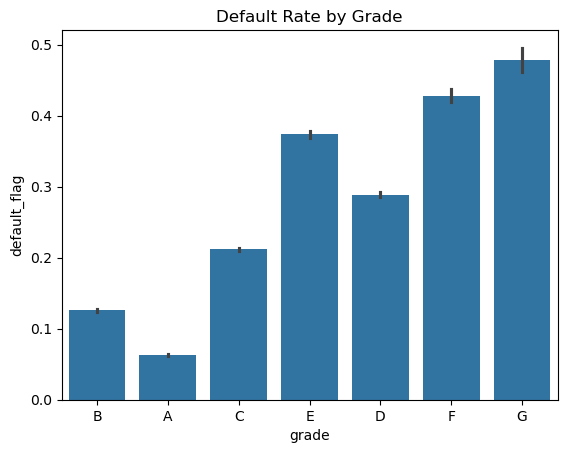

In [19]:
sns.barplot(data=df, x='grade', y='default_flag')
plt.title('Default Rate by Grade')
plt.show()

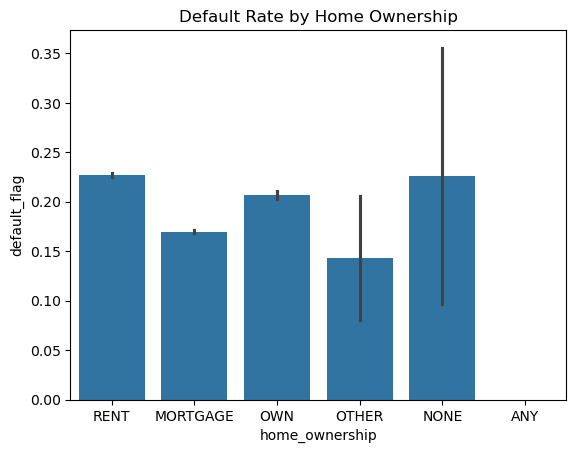

In [20]:
sns.barplot(data=df, x='home_ownership', y='default_flag')
plt.title('Default Rate by Home Ownership')
plt.show()

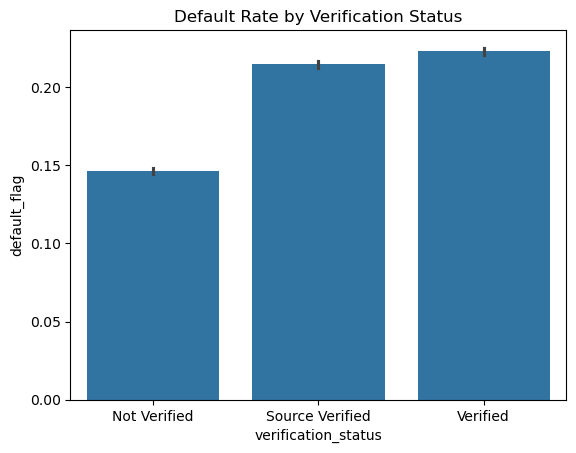

In [21]:
sns.barplot(data=df, x='verification_status', y='default_flag')
plt.title('Default Rate by Verification Status')
plt.show()

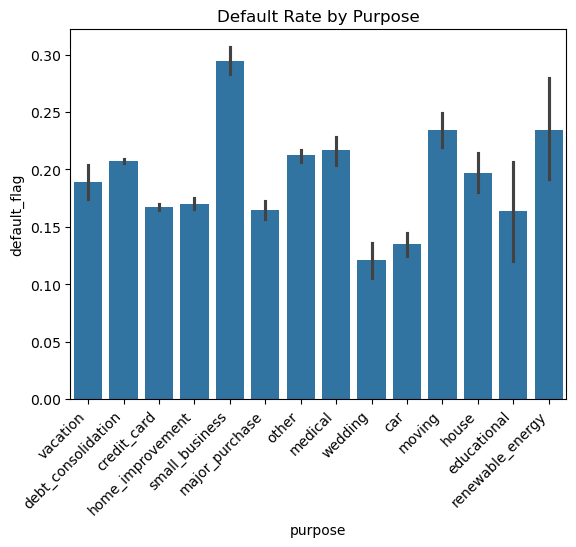

In [22]:
sns.barplot(data=df, x='purpose', y='default_flag')
plt.title('Default Rate by Purpose')
plt.xticks(rotation=45, ha='right')
plt.show()

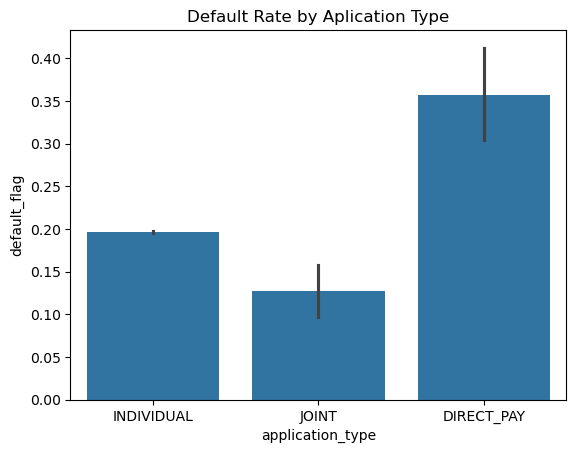

In [23]:
sns.barplot(data=df, x='application_type', y='default_flag')
plt.title('Default Rate by Aplication Type')
plt.show()

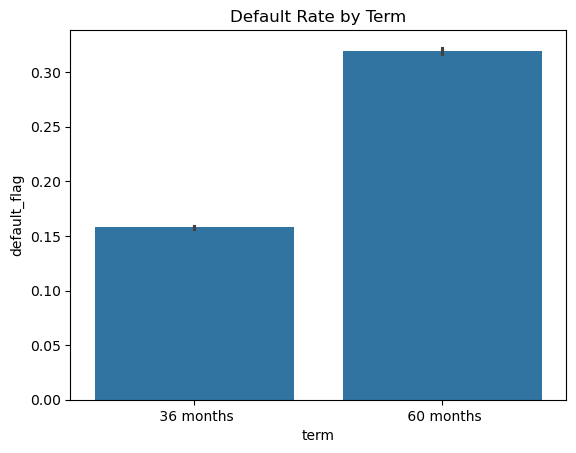

In [24]:
sns.barplot(data=df, x='term', y='default_flag')
plt.title('Default Rate by Term')
plt.show()

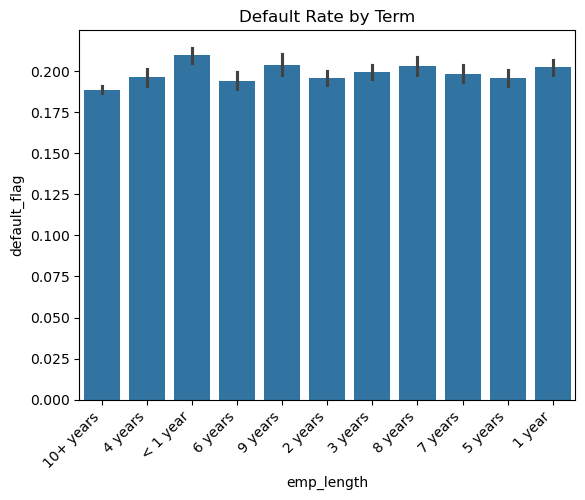

In [28]:
sns.barplot(data=df, x='emp_length', y='default_flag')
plt.title('Default Rate by Term')
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'default_flag', 'state',
       'long_term_loans'],
      dtype='object')